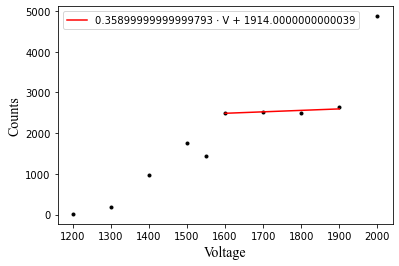

Epsilon_geo = 50%, therefore Epsilon_total = 0.544418465362495%


In [42]:
#max of 1800, 30 seconds
import numpy as np
import matplotlib.pyplot as plt
counts = np.array([183,16,978,1764,2503,2530,2505,2631,4873,1436])
voltage = np.array([1300,1200,1400,1500,1600,1700,1800,1900,2000,1550])
m,b = np.polyfit(voltage[4:8],counts[4:8],1)
lobf_name = str(m)+' ⋅ V + '+str(b)

lambda_ =np.log(2)/949232333
activity_cs = (37000*np.exp(-lambda_*(7.5)*365*24*60*60))
efficiency_total = (1750*m+b)/(activity_cs/2)*100/30
font = {'fontname':'Times New Roman'}
size = {'fontsize':14}
plt.plot(voltage,counts,'.', color = 'k')
plt.plot(voltage[4:8],voltage[4:8]*m + b, label = lobf_name, color = 'red')
plt.xlabel(r'Voltage',**font,**size)
plt.ylabel(r'Counts',**font,**size)
plt.legend()
plt.savefig(save_path+'Counting_curve.png',dpi=600)
plt.show()
print('Epsilon_geo = 50%, therefore Epsilon_total = {}%'.format(efficiency_total))

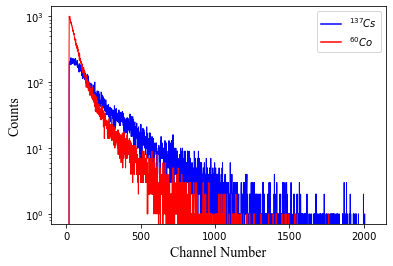

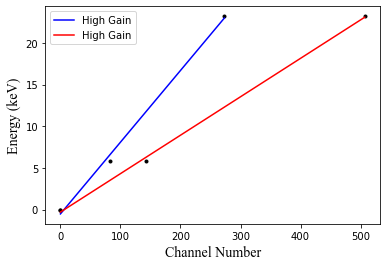

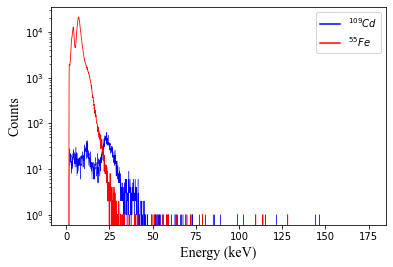

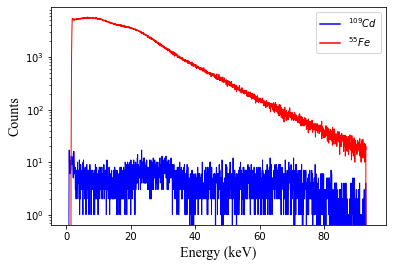

In [48]:
#need to change from here to line 15 for your personal computer, save your data into a file and have the 'path'
#be to the folder you saved the files to
import os
import pandas as pd
path = r"C:\Users\reape\Desktop\Sp24\NPRE 451\lab4\\"
save_path = r'C:\Users\reape\Desktop\Sp24\NPRE 451\lab4_deliverables\\'
Dict = {}
files = os.listdir(path)
keys = np.array([])
for file in files:
    data = np.array(pd.read_csv(path+file,header = 11,skipfooter = 14, engine = 'python'))
    Dict[file] = data
    keys = np.append(keys,file)
keys = sorted(keys)

#experiment 2

beta_cs = Dict[keys[0]]
max_bin_cs = np.where(beta_cs != 0)[0][-1]
e_max_cs = 1176.1
cs_e_per_bin =  e_max_cs/max_bin_cs

beta_co = Dict[keys[1]]
max_bin_co = np.where(beta_co != 0)[0][-1]
e_max_co = 670.2
co_e_per_bin =  e_max_co / max_bin_co

energy = np.arange(0,len(beta_cs))


fig_b,ax_b = plt.subplots()
ax_b.plot(energy,beta_cs, linewidth = 1, label = '$^{137}Cs$', color='b')
ax_b.plot(energy,beta_co, linewidth = 1,label = '$^{60}Co$', color='r')
leg_b = ax_b.legend()
for line in leg_b.get_lines():
    line.set_linewidth(1.5)
plt.yscale('log')
plt.xlabel(r'Channel Number', fontname = 'Times New Roman', fontsize = 14)
plt.ylabel(r'Counts', fontname = 'Times New Roman', fontsize = 14)
fig_b.savefig(save_path+'Beta.png', dpi = 800)
plt.show()



#experiment 3
fe_peak_e = 5.895
cd_peak_e = 23.2

fe_lg = Dict[keys[2]]
fe_hg = Dict[keys[-1]]
cd_lg = Dict[keys[3]]
cd_hg = Dict[keys[4]]
bins = np.arange(len(fe_lg))

#calibration curve  
e_of_peak = np.array([0,fe_peak_e,cd_peak_e])
bin_num_lg = np.array([0,np.argmax(fe_lg),np.argmax(cd_lg)])

real_bin_loc_cd = np.where(cd_hg == max(cd_hg))[0][1]
bin_num_hg = np.array([0,np.argmax(fe_hg),real_bin_loc_cd])
#lines of best fit 
lg_m, lg_b = np.polyfit(bin_num_lg,e_of_peak,1)
hg_m, hg_b = np.polyfit(bin_num_hg,e_of_peak,1)

plt.plot(bin_num_lg,e_of_peak,'.', color = 'k')
plt.plot(bin_num_lg,lg_m*bin_num_lg+lg_b, color = 'b', label = 'High Gain')
plt.plot(bin_num_hg,e_of_peak,'.',color = 'k')
plt.plot(bin_num_hg,hg_m*bin_num_hg+hg_b, color = 'r',label = 'High Gain')
plt.ylabel('Energy (keV)',**font,**size)
plt.xlabel('Channel Number',**font,**size)
plt.legend()
plt.savefig(save_path+'calib_curve.png', dpi = 800)
plt.show()



#low gain
fig_lg,ax_lg = plt.subplots()
ax_lg.plot(bins*lg_m,cd_lg, label = '$^{109}Cd$', linewidth = .4, color='b')
ax_lg.plot(bins*lg_m,fe_lg, label = '$^{55}Fe$', linewidth = .8, color='r')
leg_lg = ax_lg.legend()
for line in leg_lg.get_lines():
    line.set_linewidth(1.5)
plt.yscale('log')
plt.xlabel(r'Energy (keV)', **font,**size)
plt.ylabel(r'Counts', **font,**size)
fig_lg.savefig(save_path+'LowGain.png', dpi = 800)
plt.show()

#higher gain
fig_hg,ax_hg = plt.subplots()
ax_hg.plot(bins*hg_m,cd_hg, label = '$^{109}Cd$', linewidth = 1, color='b')
ax_hg.plot(bins*hg_m,fe_hg, label = '$^{55}Fe$', linewidth = 1, color='r')
leg_hg = ax_hg.legend()
for line in leg_hg.get_lines():
    line.set_linewidth(1.5)
plt.yscale('log')
plt.xlabel(r'Energy (keV)', fontname = 'Times New Roman', fontsize = 14)
plt.ylabel(r'Counts', **font,**size)
fig_hg.savefig(save_path+'HighGain.png', dpi = 800)
plt.show()

In [165]:
np.where(cd_hg >= 15)

(array([ 20,  48,  51, 507]), array([0, 0, 0, 0]))

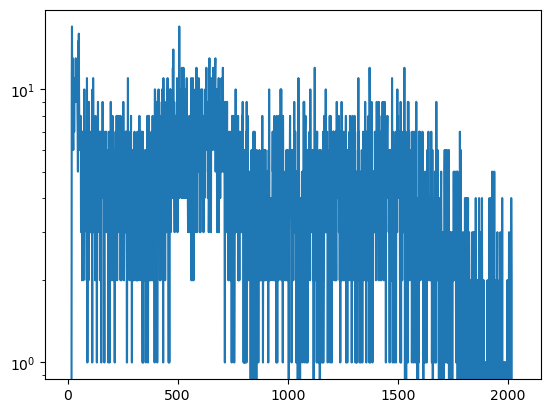

In [77]:
plt.plot(np.arange(len(cd_hg)),cd_hg)
#plt.plot(np.arange(len(cd_hg[400:600]))+400,cd_hg[400:600])
#plt.ylim(0,25)
plt.yscale('log')
plt.show()

In [75]:
jawn = np.partition(cd_hg.flatten(),-1)

In [9]:
os.listdir(path)

['e2t1-Cs137.Spe',
 'e2t2-Co60.Spe',
 'e3t1-Fe55.Spe',
 'e3t2-Cd109.Spe',
 'e3t3-Cd109.Spe',
 'e3t4-Fe55.Spe']